## News Classifier using NLP

### Importing packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from gensim import utils
import gensim.parsing.preprocessing as gsp
%matplotlib inline

### Loading the Dataset

In [4]:
dataset = pd.read_csv('bbc-text.csv')
dataset.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


Text(0.5, 0, 'Class Label')

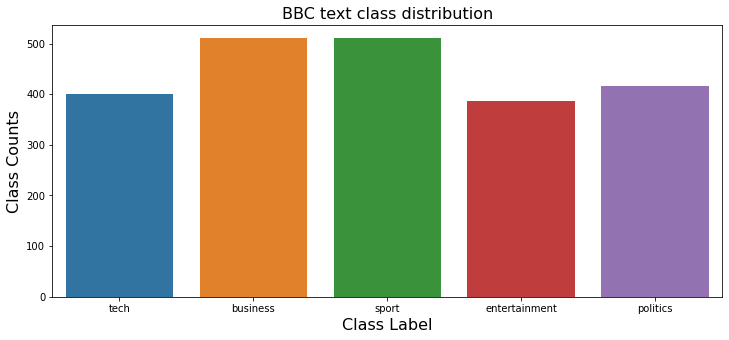

In [5]:
#Checking the count of each Category in our dataset

plt.figure(figsize=(12,5))
sns.countplot(x=dataset.category)
plt.title('BBC text class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)

So, we have business and sport has majority count.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [7]:
dataset['text'][1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [8]:
filters = [
    gsp.strip_tags,
    gsp.strip_punctuation,
    gsp.strip_multiple_whitespaces,
    gsp.strip_numeric,
    gsp.remove_stopwords,
    gsp.strip_short,
    gsp.stem_text
]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [9]:
dataset.iloc[2,1]

'tigers wary of farrell  gamble  leicester say they will not be rushed into making a bid for andy farrell should the great britain rugby league captain decide to switch codes.   we and anybody else involved in the process are still some way away from going to the next stage   tigers boss john wells told bbc radio leicester.  at the moment  there are still a lot of unknowns about andy farrell  not least his medical situation.  whoever does take him on is going to take a big  big gamble.  farrell  who has had persistent knee problems  had an operation on his knee five weeks ago and is expected to be out for another three months. leicester and saracens are believed to head the list of rugby union clubs interested in signing farrell if he decides to move to the 15-man game.  if he does move across to union  wells believes he would better off playing in the backs  at least initially.  i m sure he could make the step between league and union by being involved in the centre   said wells.  i t

In [10]:
#Cleaning the text

clean_text(dataset.iloc[2,1])

'tiger wari farrel gambl leicest rush make bid andi farrel great britain rugbi leagu captain decid switch code anybodi involv process wai awai go stage tiger boss john well told bbc radio leicest moment lot unknown andi farrel medic situat go big big gambl farrel persist knee problem oper knee week ago expect month leicest saracen believ head list rugbi union club interest sign farrel decid man game union well believ better plai back initi sure step leagu union involv centr said well think england prefer progress posit row us rugbi leagu skill forward juri cross divid club balanc struck cost gambl option bring readi replac'

In [11]:
#!pip install wordcloud
from wordcloud import WordCloud

In [12]:
#To display most frequent occurance of words in the document
def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

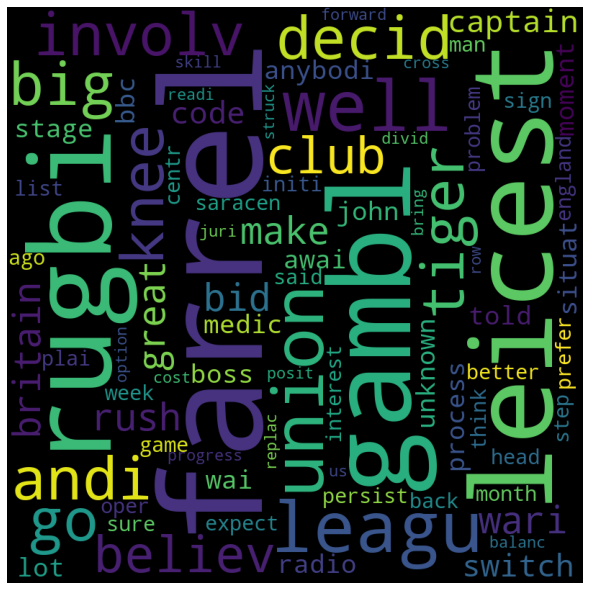

In [13]:
plot_word_cloud(clean_text(dataset.iloc[2,1]))

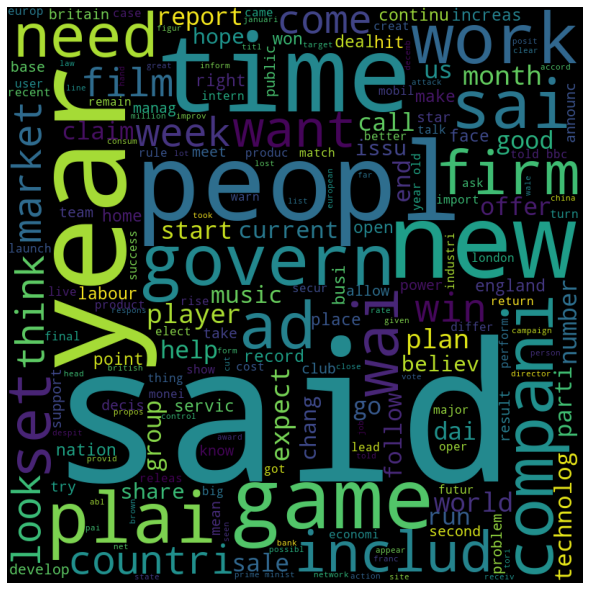

In [14]:
#To display most frequent occurance of words in the entire Corpus
texts = ''
for index, item in dataset.iterrows():
    texts = texts + ' ' + clean_text(item['text'])
    
plot_word_cloud(texts)

In [15]:
#To display most frequent occurance of words based on each Category
def plot_word_cloud_for_category(bbc_text_df, category):
    text_df = bbc_text_df.loc[bbc_text_df['category'] == str(category)]
    texts = ''
    for index, item in text_df.iterrows():
        texts = texts + ' ' + clean_text(item['text'])
    print('************'+category.title()+' Category********************')
    plot_word_cloud(texts)

************Tech Category********************


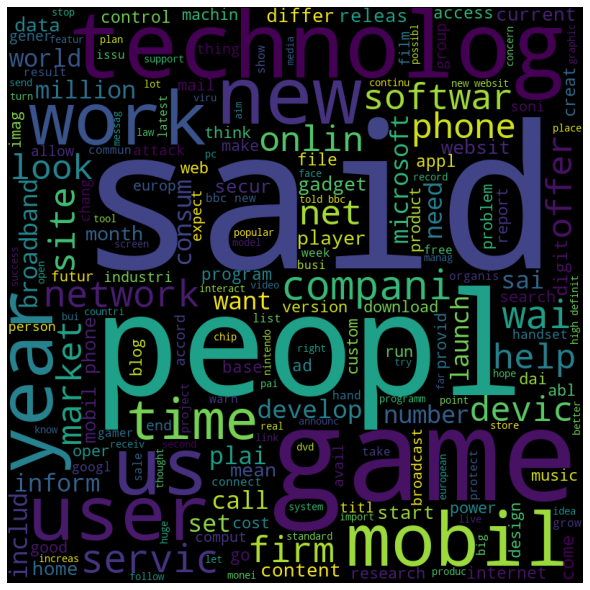

************Sport Category********************


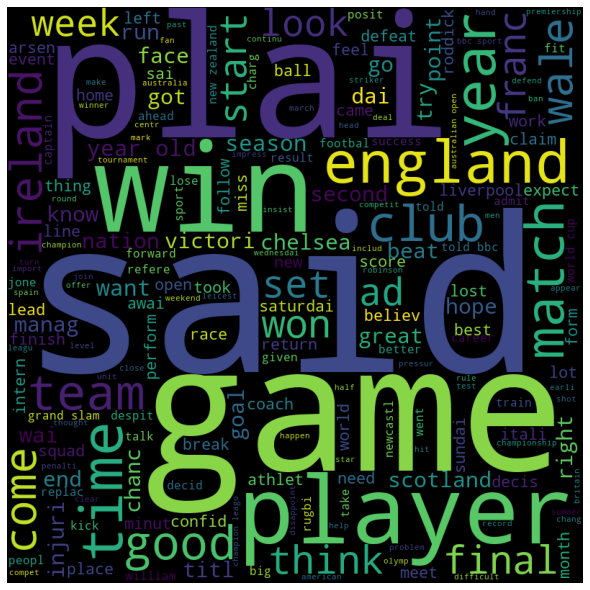

************Politics Category********************


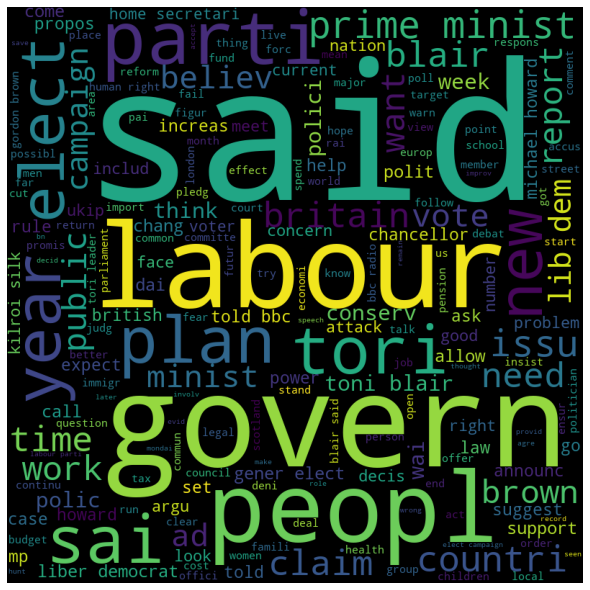

************Business Category********************


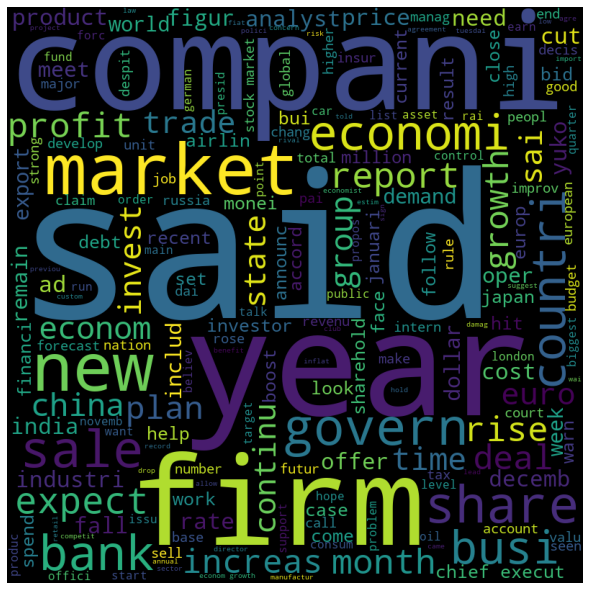

************Entertainment Category********************


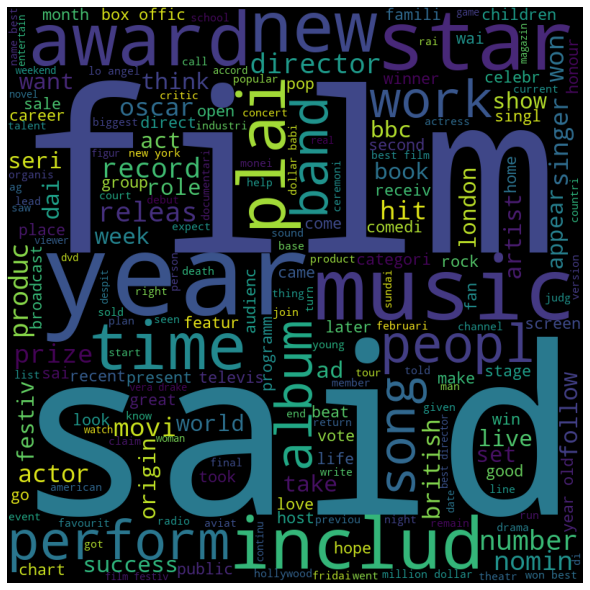

In [16]:
for cat in list(set(list(dataset["category"]))):
    plot_word_cloud_for_category(dataset,cat)

In [17]:
X = dataset['text']
y = dataset['category']

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator

class Text2TFIDFTransformer(BaseEstimator):
    
    def __init__(self):
        self._model = TfidfVectorizer()
        pass
    def fit(self, df_x, y=None):
        df_x = df_x.apply(lambda x: clean_text(x))
        self._model.fit(df_x)
        return self
    
    def transform(self, df_x):
        return self._model.transform(df_x)

In [19]:
tfidf_transformers = Text2TFIDFTransformer()
tfidf_vectors = tfidf_transformers.fit(X).transform(X)


In [20]:
tfidf_vectors.shape

(2225, 18754)

In [21]:
print(tfidf_vectors)

  (0, 18656)	0.026751783070208267
  (0, 18461)	0.012282569403139645
  (0, 18330)	0.06321612895581909
  (0, 18304)	0.1583605258104538
  (0, 18174)	0.03191861694040893
  (0, 18106)	0.07347900571034054
  (0, 18077)	0.0820082845034905
  (0, 18027)	0.08634135472606572
  (0, 17846)	0.024976845920106364
  (0, 17835)	0.03920692490243918
  (0, 17819)	0.0237112847547106
  (0, 17635)	0.10369692742506256
  (0, 17586)	0.058415007300576784
  (0, 17171)	0.42378247529420265
  (0, 17022)	0.04909762905009908
  (0, 16860)	0.024467110895914575
  (0, 16826)	0.012395674298416093
  (0, 16801)	0.04354600077310887
  (0, 16800)	0.1061221922410514
  (0, 16759)	0.019836834312179287
  (0, 16756)	0.02454881452504954
  (0, 16637)	0.108042004704681
  (0, 16625)	0.3048220054117621
  (0, 16528)	0.02112249983533661
  (0, 16356)	0.030876741901122738
  :	:
  (2224, 8118)	0.5554941760150036
  (2224, 8007)	0.10226374007302491
  (2224, 7455)	0.11194511747688254
  (2224, 7426)	0.0589324755687766
  (2224, 7372)	0.0462288710188

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(list(set(list(dataset['category']))))

LabelEncoder()

In [23]:
list(le.classes_)

['business', 'entertainment', 'politics', 'sport', 'tech']

In [24]:
le.transform(list(set(list(dataset['category']))))

array([4, 3, 2, 0, 1])

In [25]:
dataset['category'] = le.transform(dataset['category'])

In [26]:
type(dataset['text'].values[1])

str

### Splitting the data into train and test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['text'].values.astype('U'),dataset['category'].values.astype('int32'), test_size=0.10, random_state=0)
classes  = dataset['category'].unique()

In [28]:
classes

array([4, 0, 3, 1, 2])

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

In [30]:
X_train[1]

'no re-draft  for eu patent law a proposed european law on software patents will not be re-drafted by the european commission (ec) despite requests by meps.  the law is proving controversial and has been in limbo for a year. some major tech firms say it is needed to protect inventions  while others fear it will hurt smaller tech firms the ec says the council of ministers will adopt a draft version that was agreed upon last may but said it would review  all aspects of the directive . the directive is intended to offer patent protection to inventions that use software to achieve their effect  in other words   computer implemented invention .  in a letter  ec president jos&#233; manuel barroso told the president of the european parliament  josep borrell  that the commission  did not intend to refer a new proposal to the parliament and the council (of ministers)  as it had supported the agreement reached by ministers in may 2004.  if the european council agrees on the draft directive it wi

In [31]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,2),  max_features=50000, max_df=0.5, use_idf=True, norm='l2')
counts = vectorizer.fit_transform(X_train)
vocab = vectorizer.vocabulary_

In [32]:
vocab

{'kenyon': 23627,
 'denies': 12194,
 'robben': 35145,
 'barca': 5543,
 'return': 34901,
 'chelsea': 9078,
 'chief': 9104,
 'executive': 14381,
 'peter': 32225,
 'played': 32517,
 'down': 13101,
 'reports': 34690,
 'arjen': 4585,
 'champions': 8917,
 'league': 24420,
 'match': 25890,
 'against': 1732,
 'barcelona': 5544,
 'responding': 34812,
 'well': 48178,
 'treatment': 45434,
 'started': 38121,
 'running': 35411,
 'friday': 16231,
 'we': 47889,
 'll': 24994,
 'wait': 47152,
 'see': 36226,
 'told': 44905,
 'bbc': 5637,
 'five': 15422,
 'live': 24952,
 'sportsweek': 37824,
 're': 34068,
 'looking': 25140,
 'getting': 17020,
 'him': 19519,
 'back': 5355,
 'soon': 37523,
 'possible': 32878,
 'when': 48418,
 'right': 35024,
 'us': 46238,
 'there': 42968,
 'no': 28517,
 'plans': 32454,
 'moment': 26683,
 'around': 4601,
 'game': 16569,
 'his': 19579,
 'comments': 9791,
 'those': 43402,
 'jean': 23121,
 'pierre': 32356,
 'meersseman': 26118,
 'who': 48612,
 'treated': 45429,
 'dutchman': 13

In [33]:
classifier = SGDClassifier(alpha=1e-05, max_iter=50, penalty='elasticnet')
targets = y_train
classfier = classifier.fit(counts, targets)
examples_counts = vectorizer.transform(X_test)
predictors = classifier.predict(examples_counts)

In [34]:
import pickle
pickle.dump(classifier,open("news_classifier.pkl","wb"))
pickle.dump(vocab,open("vocab_news_classifier.pkl","wb"))

In [35]:
ls

 Volume in drive K is subject
 Volume Serial Number is C289-50A3

 Directory of K:\DATA SCIENCE Reference\Projects\News_Classifier_NLP

26-03-2023  16:21    <DIR>          .
26-03-2023  15:24    <DIR>          ..
26-03-2023  16:17             1,936 .gitignore
26-03-2023  16:14    <DIR>          .ipynb_checkpoints
26-03-2023  15:33                 0 app.py
26-03-2023  11:49         5,057,493 bbc-text.csv
26-03-2023  15:25            11,558 LICENSE
26-03-2023  16:15            37,952 News Classifier.ipynb
26-03-2023  16:21         2,001,032 news_classifier.pkl
26-03-2023  15:40    <DIR>          newsenv
26-03-2023  15:25                21 README.md
26-03-2023  16:08                84 requirements.txt
26-03-2023  16:21         1,375,413 vocab_news_classifier.pkl
               9 File(s)      8,485,489 bytes
               4 Dir(s)  82,213,662,720 bytes free


In [36]:
scores = cross_val_score(classfier, examples_counts, y_test, cv=5)

In [37]:
score = scores.mean()
print(round(score,3))

0.969


In [38]:
vec = open("news_classifier.pkl", 'rb')
loaded_model = pickle.load(vec)
vcb = open("vocab_news_classifier.pkl", 'rb')
loaded_vocab = pickle.load(vcb)

In [39]:
test = clean_text(dataset.iloc[2,1])
examples = [test]

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
count_vect = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2',vocabulary=loaded_vocab)
tfidf_transformer = TfidfTransformer()
x_count = count_vect.fit_transform(examples)
predicted = loaded_model.predict(x_count)
result_category = predicted[0]
result_category

3

In [42]:
le.inverse_transform([3])

array(['sport'], dtype='<U13')

In [43]:
newTest = """Chinese smartphone major Xiaomi on Thursday said its arm MI India will distribute 2,500 handsets worth Rs 2 crore to support online education of children who are worst affected by the COVID-19 pandemic in the country. "MI India distribution and retails came up with a fantastic idea. Together they will be contributing 2,500 smartphones to enable children most impacted by the pandemic to access quality education. In this endeavour we found the right partner Teach for India who is committed to the cause," its chief operating officer Muralikrishnan B said in an online video.

The company's managing director Manu Jain said MI India is committed to digital India initiative and has always supported education for all.

The company shared that the smartphones pledged are worth Rs 2 crore. Jain appealed to people to bring in notice of the company about anyone who needs a smartphone for online education and the company will try to help them.
"""

In [44]:
test= clean_text(newTest)
examples = [test]
count_vect = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2',vocabulary=loaded_vocab)
tfidf_transformer = TfidfTransformer()
x_count = count_vect.fit_transform(examples)
predicted = loaded_model.predict(x_count)
result_category = predicted[0]
result_category

0

In [45]:
final_pred = le.inverse_transform([result_category])
print(final_pred)

['business']


In [46]:
print(pd.__version__)

1.4.2
